In [48]:
ToDo = '''
Data Smell:- context-independent, data value-based indications of latent data quality issues caused by poor practices that may lead to problems in the future.
We need  to detect data smells in the dataset and suggest the user to fix them.

14 data smells identified in the "Data Smells in Public Datasets" paper, categorized by type:
Redundant value smells:
    red-corr: Correlated features
    red-uid: Unique identifiers
    red-dup: Duplicate examples
Categorical value smells:
    cat-hierarchy: Hierarchy from label encoding
    cat-bin: Binning categorical features→categorical values with large cardinality + one-hot-encoding
Missing value smells:
    miss-null: Missing values
    miss-sp-val: Special missing values
    miss-bin: Binary missing values
String value smells:
    str-num: Numerical feature as string
    str-sanitise: Strings with special characters
    str-human: Strings in human-friendly formats
Miscellaneous value smells:
    misc-unit: Unknown unit of measure
    misc-balance: Imbalanced examples
    misc-sensitive: Presence of sensitive features

Todo: To detect data smells, and suggest the user to fix them
'''
print(ToDo)


Data Smell:- context-independent, data value-based indications of latent data quality issues caused by poor practices that may lead to problems in the future.
We need  to detect data smells in the dataset and suggest the user to fix them.

14 data smells identified in the "Data Smells in Public Datasets" paper, categorized by type:
Redundant value smells:
    red-corr: Correlated features
    red-uid: Unique identifiers
    red-dup: Duplicate examples
Categorical value smells:
    cat-hierarchy: Hierarchy from label encoding
    cat-bin: Binning categorical features→categorical values with large cardinality + one-hot-encoding
Missing value smells:
    miss-null: Missing values
    miss-sp-val: Special missing values
    miss-bin: Binary missing values
String value smells:
    str-num: Numerical feature as string
    str-sanitise: Strings with special characters
    str-human: Strings in human-friendly formats
Miscellaneous value smells:
    misc-unit: Unknown unit of measure
    misc-

In [49]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns 
import warnings
warnings.filterwarnings('ignore')


In [50]:
df = pd.read_csv("data.csv")
df.head()

,b,30.83,0,u,g,w,v,1.25,t,t.1,01,f,g.1,00202,0.1,+
0,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
1,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
2,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
3,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+
4,b,32.08,4.000,u,g,m,v,2.50,t,f,0,t,g,00360,0,+


In [51]:
df.columns


Index(['b', '30.83', '0', 'u', 'g', 'w', 'v', '1.25', 't', 't.1', '01', 'f',
       'g.1', '00202', '0.1', '+'],
      dtype='object')

In [52]:
df.dtypes

b         object
30.83     object
0        float64
u         object
g         object
w         object
v         object
1.25     float64
t         object
t.1       object
01         int64
f         object
g.1       object
00202     object
0.1        int64
+         object
dtype: object

Checking presence of Headings

In [53]:
import csv

filename = "data.csv"

# Open the CSV file in read mode
with open(filename, 'r') as csvfile:

  # Create a CSV reader object
  csvreader = csv.reader(csvfile)

  # Get the first row from the CSV file
  first_row = next(csvreader)

  # Check if the first row contains headings or not
  if any(field.strip() != '' for field in first_row) and not any(field.strip().isdigit() for field in first_row):
    print("The CSV file has headings in the first row.")
  else:
    print("The CSV file does not have headings in the first row.")

The CSV file does not have headings in the first row.


# 4.4 Missing Value Smells: 

(1) 4.4.1Missing Null(miss-null)

In [54]:

# Check for missing values
missing_values_count = df.isnull().sum().sum()
if missing_values_count == 0:
    print("There are no missing values in the dataset.")
else:
    print("There are missing values in the dataset.")
    print("Number of missing values:", missing_values_count)
    print("Percentage of missing values:", round(missing_values_count / (df.shape[0] * df.shape[1]) * 100, 2), "%")

    print("Missing values in each column:")
    print(df.isnull().sum())





There are no missing values in the dataset.


(2) 4.4.2 miss-sp-val

In [55]:
# Check for special missing values
special_missing_values = ['-', 'n/a', 'N/A', 'NA', '--', '?']
pres = {val: 0 for val in special_missing_values}
for val in special_missing_values:
    pres[val] = df.isin([val]).sum().sum()

if any(pres.values()):
    print("There are special missing values in the dataset.")
    print("Number of special missing values:", sum(pres.values()))
    print("Percentage of special missing values:", round(sum(pres.values()) / (df.shape[0] * df.shape[1]) * 100, 2), "%")
    print("Special missing values in each column:")
    for col in df.columns:
        print(col, ":", df[col].isin(special_missing_values).sum())
else:
    print("There are no special missing values in the dataset.")


There are special missing values in the dataset.
Number of special missing values: 449
Percentage of special missing values: 4.07 %
Special missing values in each column:
b : 12
30.83 : 12
0 : 0
u : 6
g : 6
w : 9
v : 9
1.25 : 0
t : 0
t.1 : 0
01 : 0
f : 0
g.1 : 0
00202 : 13
0.1 : 0
+ : 382


(3) 4.4.3 Binary missing values (miss-bin)


In [56]:

bin_miss = False
# Iterate over each column
for col in df.columns:
    # Check if there are any missing values in the column
    if df[col].isnull().sum() > 0:
        # Check if the missing values are binary
        if df[col].nunique() == 2:
            # Check if there is an implicit meaning to the missing values
            non_missing_values = df[col].dropna().unique()
            if len(non_missing_values) == 1:
                print(f"{col} contains binary missing values with an implicit meaning of {non_missing_values[0]}")
                bin_miss = True

if not bin_miss:
    print("There are no binary missing values with an implicit meaning in the dataset.")
   

There are no binary missing values with an implicit meaning in the dataset.


# 4.1 Redundant Value Smells 

(4) 4.1.1 Correlated features (red-corr) 

In [57]:
# Compute the correlation matrix
corr_matrix = df.corr()

# Identify highly correlated features
high_corr_features = set()
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > 0.7: # Change the threshold value as needed
            colname = corr_matrix.columns[i]
            high_corr_features.add(colname)
# Highest cvalue of correlation on non-diagonal elements
max_corr = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool)).stack().max()
print("Maximum correlation value among any two values:", max_corr)

# print giving info
if len(high_corr_features) > 0:
    print("There are highly correlated features in the dataset.")
    print("Number of highly correlated features:", len(high_corr_features))
    print("Highly correlated features:", high_corr_features)
else:
    print("There are no highly correlated features in the dataset.")

Maximum correlation value among any two values: 0.3222471778654087
There are no highly correlated features in the dataset.


(5) 4.1.2 Unique identifiers (red-uid) -     
A machine learning model may learn some hidden relationship between the uids and the target values that produces a high accu-racy during training.  
Although uids are useful when per-forming merge or join operations on two or more database tables, they become redundant when training machine learning models.   
 Their presence in a dataset is a   smell for potential problems in downstream stages.  

In [58]:
# Identify unique identifier columns
uid_cols = []
for col in df.columns:
    if len(df[col].unique()) == len(df):
        uid_cols.append(col)

# Print info
if len(uid_cols) > 0:
    print("There are unique identifier columns in the dataset.")
    print("Number of unique identifier columns:", len(uid_cols))
    print("Unique identifier columns:", uid_cols)
else:
    print("There are no unique identifier columns in the dataset.")


There are no unique identifier columns in the dataset.


(6) 1.3 Duplicate examples (red-dup).

In [59]:
duplicates = df.duplicated()
if any(duplicates):
    print("Duplicate examples are present in the dataset.")
    print("Number of duplicate examples:", duplicates.sum())
    print("Indices of duplicate examples:", df.index[duplicates].tolist())
else:
    print("There are no duplicate examples in the dataset.")


There are no duplicate examples in the dataset.


# 4.2 Categorical Value Smells

 (7)  4.2.1 Hierarchy from label encoding (cat-hierarchy)  
Label encoding sensitive categorical features can introduce unwanted hierarchy amongst the values and lead to incorrect and biased results in machine learning models.  
The presence of sensitive categorical features is a smell to avoid introducing bias into the model.  
One-hot encoding technique can be used to avoid unwanted hierarchy amongst the values in sensitive categorical features.


In [60]:

# Define list of sensitive categorical features
sensitive_features = ['race', 'gender', 'religion','nationality','']

# Check if any of the sensitive features are present
for feature in sensitive_features:
    if feature in df.columns and df[feature].dtype == 'object':
        print(f"Sensitive feature {feature} detected. Consider using one-hot encoding instead of label encoding.")

'''

# Check for label encoding hierarchy
cat_features = df.select_dtypes(include=['object']).columns.tolist()
sensitive_cat_features = ['sex', 'race']  # Add more sensitive categorical features as necessary
hierarchy_detected = False

for feature in cat_features:
    if feature not in sensitive_cat_features:
        levels = df[feature].unique().tolist()
        levels_encoding = dict(zip(levels, range(len(levels))))
        expected_encoding = sorted(levels_encoding.values())
        
        if list(levels_encoding.values()) != expected_encoding:
            print(f"Hierarchy detected in categorical feature: {feature}")
            hierarchy_detected = True

# Suggest correction
if hierarchy_detected:
    print("Sensitive categorical features detected. Use one-hot encoding to avoid introducing bias in the model.")
else:
    print("No hierarchy detected in categorical features.")
    '''

'\n\n# Check for label encoding hierarchy\ncat_features = df.select_dtypes(include=[\'object\']).columns.tolist()\nsensitive_cat_features = [\'sex\', \'race\']  # Add more sensitive categorical features as necessary\nhierarchy_detected = False\n\nfor feature in cat_features:\n    if feature not in sensitive_cat_features:\n        levels = df[feature].unique().tolist()\n        levels_encoding = dict(zip(levels, range(len(levels))))\n        expected_encoding = sorted(levels_encoding.values())\n        \n        if list(levels_encoding.values()) != expected_encoding:\n            print(f"Hierarchy detected in categorical feature: {feature}")\n            hierarchy_detected = True\n\n# Suggest correction\nif hierarchy_detected:\n    print("Sensitive categorical features detected. Use one-hot encoding to avoid introducing bias in the model.")\nelse:\n    print("No hierarchy detected in categorical features.")\n    '

(8)  4.2.2 Binning categorical features (cat-bin)  
One-hot encoding a feature with high cardinality can result in a very large feature space and incur higher memory, disk space and computation costs throughout the machine learning lifecycle.  
Presence of categorical features with high cardinality in their data is a smell to perform potential data transformations to reduce the cardinality.  
A common practice amongst data scientists to address such a problem is to bin several values together.


In [61]:

# loop through each column
for col in df.columns:
    # check if the column is categorical
    if df[col].dtype == 'object':
        # check the number of unique values
        unique_vals = len(df[col].unique())
        # set a threshold for high cardinality
        threshold = 10
        if unique_vals > threshold:
            print(f"The '{col}' column has high cardinality with {unique_vals} unique values.")
            # perform binning
            
            # ...
        # else:
            # print(f"The '{col}' column has low cardinality with {unique_vals} unique values.")

The '30.83' column has high cardinality with 349 unique values.
The 'w' column has high cardinality with 15 unique values.
The '00202' column has high cardinality with 170 unique values.


(9)  4.3.1 Presence of sensitive features (misc-sensitive)  
Sensitive features are high-impact features that contribute to biased and unfair model predictions.  
Presence of sensitive features are a smell that may lead to biased and unfair model predictions.  
Potential mitigation strategies include not using sensitive features during model training and introducing appropriate regularization techniques to combat bias.


In [62]:

for feature in sensitive_features:
    if feature in df.columns:
        print(f"{feature} is a sensitive feature and should be handled with care.")

# Check for sensitive features
sensitive_features = ["age", "gender", "sex", "race", "religion","ethnic"]  # Add more sensitive features as necessary, or remove the current ones as we get clarity

if any(feature in sensitive_features for feature in df.columns):
    print("Sensitive features are present in the dataset.")
    print("Sensitive features:", sensitive_features)
   

# Mitigation strategies 
    print("Potential mitigation strategies:")
    print("- Exclude sensitive features from the training set.")
    print("- Introduce appropriate regularization techniques to combat bias.")
    print("- Consider using trustworthy AI approaches to address issues regarding safety, robustness, explainability, fairness and privacy in machine learning models.\n")
    print('Suggested code snippet:') 
    print('''    sensitive_features = ["age", "gender", "sex", "race", "religion"]
    data_filtered = data.drop(sensitive_features, axis=1)
    print("Sensitive features removed from dataset.")''')


else:
    print("There are no sensitive features in the dataset.")
    print("No mitigation strategies are required.")


There are no sensitive features in the dataset.
No mitigation strategies are required.


(10) 4.3.2  Class Imbalance  (misc-balance)

In [63]:
imb = False; nu = 1
# Check for class imbalance
for col in df.columns:
    class_counts = df[col].value_counts()
    if class_counts.min() / class_counts.max() < 0.1:
        print(f"{nu}) Class imbalance detected in column '{col}' with ", end= '')
        imb = True        
        print("Class imbalance ratio:", round(class_counts.min() / class_counts.max(), 2),'\n')
        nu += 1
        # ck = class_counts.to_dict()
        # # print few elements of dictionary
        # print("Class counts:", {k: ck[k] for k in list(ck)[:5]}, '... etc')

if imb:
    print("Potential mitigation strategies:")
    print("- Use appropriate sampling techniques to balance the classes.")
    print("- Use appropriate evaluation metrics like F1 score, precision, recall, etc. as accuracy is not a good metric for imbalanced datasets.")
    print("- Use appropriate regularization techniques like class weights to combat bias.")
else:
    print("There is no class imbalance in the dataset.")
    print("No mitigation strategies are required.")

1) Class imbalance detected in column 'b' with Class imbalance ratio: 0.03 

2) Class imbalance detected in column '30.83' with Class imbalance ratio: 0.08 

3) Class imbalance detected in column '0' with Class imbalance ratio: 0.05 

4) Class imbalance detected in column 'u' with Class imbalance ratio: 0.0 

5) Class imbalance detected in column 'g' with Class imbalance ratio: 0.0 

6) Class imbalance detected in column 'w' with Class imbalance ratio: 0.02 

7) Class imbalance detected in column 'v' with Class imbalance ratio: 0.01 

8) Class imbalance detected in column '1.25' with Class imbalance ratio: 0.01 

9) Class imbalance detected in column '01' with Class imbalance ratio: 0.0 

10) Class imbalance detected in column 'g.1' with Class imbalance ratio: 0.01 

11) Class imbalance detected in column '00202' with Class imbalance ratio: 0.01 

12) Class imbalance detected in column '0.1' with Class imbalance ratio: 0.0 

13) Class imbalance detected in column '+' with Class imbalan

(11) 4.3.3 Outliers  (misc-out)

1) Column 0 has 2.467343976777939% outliers
2) Column 1.25 has 9.143686502177069% outliers
3) Column 01 has 11.46589259796807% outliers
4) Column 0.1 has 16.25544267053701% outliers

The dataset has outliers


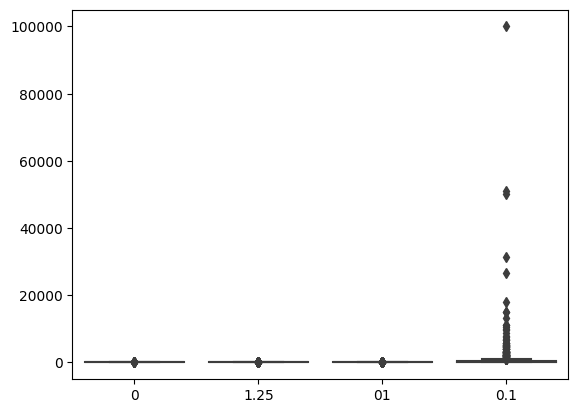

In [64]:
# Plot boxplots for all numerical columns
sns.boxplot(data=df.select_dtypes(include=['float64', 'int64']))
# Visualize boxplots to detect outliers
nu = 1;hasOutliers = False
for col in df.columns:
    # if its numerical column, then print the percentage of outlier
    if df[col].dtype == 'float64' or df[col].dtype == 'int64':
        # Calculate the first and third quartile
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        # Calculate the interquartile range
        IQR = Q3 - Q1
        # Calculate the outlier step
        outlier_step = 1.5 * IQR
        # Calculate the number of outliers
        num_outliers = len(df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step)])
        # Calculate the percentage of outliers
        perc_outliers = num_outliers / len(df) * 100
        print(f'{nu}) Column {col} has {perc_outliers}% outliers')
        nu += 1
        if perc_outliers > 0:
            hasOutliers = True

if hasOutliers:
    print('\nThe dataset has outliers')
else:
    print('\nThe dataset does not have outliers')



# 4.5 String Value Smells

(12) 4.5.1  Strings with special characters (str-sanitise):  
        Presence of leading and trailing whitespaces and special characters in structured data can create potential problems in the data analysis stage.  
        Categorical features represented as strings can confuse data analysis tools and lead to false results.  
        Handling presence of special characters in string features requires a case-by-case analysis and solution, but removing leading and trailing whitespaces is a common task.  


In [65]:
import re

def detect_special_characters(df):
    special_char_features = []
    for col in df.columns:
        if df[col].dtype == 'object':
            pattern = re.compile('[^A-Za-z0-9\s]+')
            match = pattern.search(df[col].iloc[0])
            if match:
                special_char_features.append(col)
    if len(special_char_features) > 0:
        print("There are features with special characters in the dataset.")
        print("Features with special characters:", special_char_features)
    else:
        print("There are no features with special characters in the dataset.")

In [66]:

# create a list to store the column names with trailing spaces
cols_with_trailing_spaces = []

# loop through each column in the dataset
for col in df.columns:
    # check if the column is a string type
    if df[col].dtype == 'object':
        # check if the column contains trailing spaces
        if df[col].str.endswith(' ').any():
            cols_with_trailing_spaces.append(col)

# print the columns with trailing spaces
if len(cols_with_trailing_spaces) > 0:
    print("There are columns with trailing spaces in the dataset.")
    print("Columns with trailing spaces:", cols_with_trailing_spaces)
else:
    print("There are no columns with trailing spaces in the dataset.")

    
# Check for different string interpretations due to capital letters usage
for col in df.select_dtypes(include=['object']):
    unique_vals = df[col].str.lower().unique()
    if len(unique_vals) != len(set(unique_vals)):
        print(f"Column '{col}' contains different string interpretations due to capital letters usage")

There are no columns with trailing spaces in the dataset.


In [67]:
# # refactoring: 
# for col in df.select_dtypes(include=['object']):
#     df[col] = df[col].str.strip()

(13) 4.5.2 Numerical features as string (str-num):
The presence of features whose name indicates numerical type data, but the data analysis tool interprets the type as string is a smell.
Extracting valuable numerical information from such features can be beneficial for model training.
Machine learning models tend to perform better when trained with more data.

In [68]:
# create empty list to store the column names of numerical features
numerical_columns = []

# loop through each column in the dataset
for column in df.columns:


    # check if the column contains only numerical values
    if df[column].apply(lambda x: str(x).replace('.', '').isdigit()).all():
        
        # if the column contains only numerical values, add its name to the list of numerical columns
        numerical_columns.append(column)
    # print the list of numerical columns
    print("Numerical columns:", numerical_columns)

# code for correcting numerical features as strings
# loop through each column in the dataset
print('For Correcting the error:\n Code snippet:')

print('''for column in df.columns:

    # check if the column contains only numerical values
    if df[column].apply(lambda x: str(x).replace('.', '').isdigit()).all():
        
        # if the column contains only numerical values, convert the data type to float
        df[column] = df[column].astype(float)
    
# save the corrected dataset to a new file
df.to_csv("corrected_data.csv", index=False)''')

Numerical columns: []
Numerical columns: []
Numerical columns: ['0']
Numerical columns: ['0']
Numerical columns: ['0']
Numerical columns: ['0']
Numerical columns: ['0']
Numerical columns: ['0', '1.25']
Numerical columns: ['0', '1.25']
Numerical columns: ['0', '1.25']
Numerical columns: ['0', '1.25', '01']
Numerical columns: ['0', '1.25', '01']
Numerical columns: ['0', '1.25', '01']
Numerical columns: ['0', '1.25', '01']
Numerical columns: ['0', '1.25', '01', '0.1']
Numerical columns: ['0', '1.25', '01', '0.1']
For Correcting the error:
 Code snippet:
for column in df.columns:

    # check if the column contains only numerical values
    if df[column].apply(lambda x: str(x).replace('.', '').isdigit()).all():
        
        # if the column contains only numerical values, convert the data type to float
        df[column] = df[column].astype(float)
    
# save the corrected dataset to a new file
df.to_csv("corrected_data.csv", index=False)


(14) 4.5.3 Strings in human-friendly formats (str-human):   
Numerical information being represented in a human-friendly format is a smell for potential problems during the data analysis stage.   
Machine learning models generally perform better when trained with standardised and uniform data.   
Converting numerical information from a human-friendly format to a useful numerical representation can be challenging and may require domain knowledge or further investigation.   
   


In [72]:
import pandas as pd
import re

# Load data
df = pd.read_csv('data.csv')

# Define regex pattern for human-friendly formats
pattern = r'^\d{1,3}(,\d{3})*(\.\d+)?$'
hum = False
# Loop through columns and check for human-friendly formats
for col in df.columns:
    if df[col].dtype == 'object':
        if df[col].str.match(pattern).all():
            # detected human-friendly format
            print(f"Column '{col}' contains human-friendly format")
            hum = True
            # # Convert human-friendly format to float
            # df[col] = df[col].str.replace(',', '').astype(float)
if hum:
    print('''
    For converting the human-friendly format to float:
    Code snippet:
    for col in df.columns:
        if df[col].dtype == 'object':
            if df[col].str.match(pattern).all():
                # detected human-friendly format
                # Convert human-friendly format to float
                df[col] = df[col].str.replace(',', '').astype(float)''')
else:
    print("There are no human-friendly formats in the dataset.")

There are no human-friendly formats in the dataset.
